In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# import numpy as np
from numpy import sin, cos, pi, linspace, absolute, array, savetxt  # functions needed to generate clean signal
from numpy.random import randn                             # function needed to add noise

In [3]:
from scipy.signal import savgol_filter                 # import Savitzky-Golay low pass filter for data smoothing

In [4]:
# Generate a noisy signal to be filtered.
t = linspace(-1, 1, 201)
delta_t = absolute(t[1] - t[0]) 

x = (sin(2 * pi * 0.75 * t*(1-t) + 2.1) + 0.1*sin(2 * pi * 1.25 * t + 1) +
    0.18*cos(2 * pi * 3.85 * t))
xn = x + randn(len(t)) * 0.08

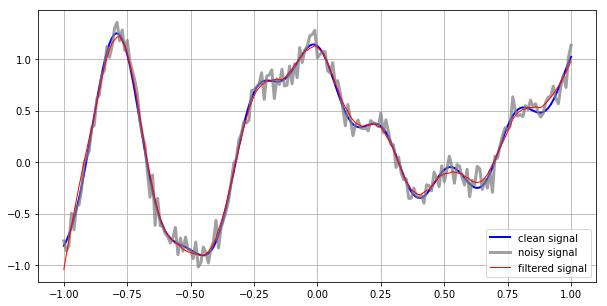

In [5]:
window_width = 25                              # number of points over which data is fit and smoothed
polynomial_order = 2                     # order of polynominal used to fit data (must be less than window_width)

smoothed_data   = savgol_filter(xn, window_width, polynomial_order)                             #smooth data
data_derivative = savgol_filter(xn, window_width, polynomial_order, deriv = 1, delta = delta_t) #take 1st derivative

# Make the plot.
plt.figure(figsize=(10,5))
plt.plot(t,x, 'blue', linewidth = 2, label = 'clean signal')
plt.plot(t, xn, 'grey', linewidth=3, alpha=0.75, label = 'noisy signal')
plt.plot(t, smoothed_data, 'red', linewidth=1, label = 'filtered signal')
plt.legend(loc='best')
plt.grid(True)
plt.show()

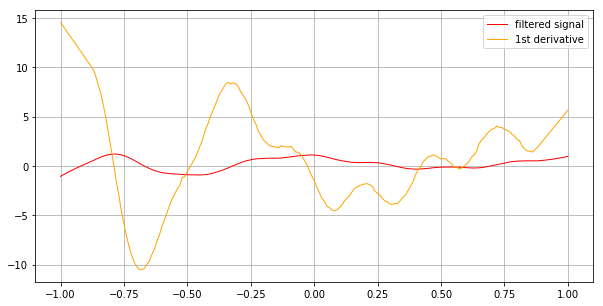

In [6]:
plt.figure(figsize=(10,5))
#plt.plot(t,x, 'blue', linewidth = 2, label = 'clean signal')
plt.plot(t, smoothed_data, 'red', linewidth=1, label = 'filtered signal')
plt.plot(t, data_derivative, 'orange', linewidth=1, label = '1st derivative')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [7]:
output_filename = 'filtered_data.csv'                   #provide a name for the new file
header_row_text = 'time, clean_signal, noisy_signal, filtered_signal, derivative'  
comment_text = ''                               

output_data = array([t, x, xn, smoothed_data, data_derivative]).T     #create a 2D matrix and transpose rows and columns (clever trick) 
savetxt(output_filename, output_data, delimiter = ',', header = header_row_text, comments = comment_text) 
